In [2]:
import quimb as qu
import quimb.tensor as qtn
from itertools import chain, product
import numpy as np
from importlib import reload
import qubitTN as beeky
from autoray import reshape
import spinlessQubit as sq

0.18160809178642645


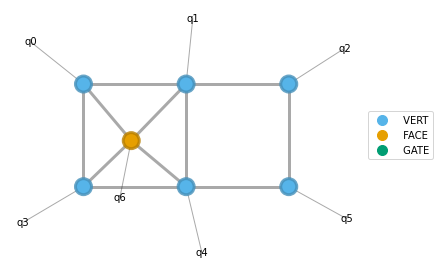

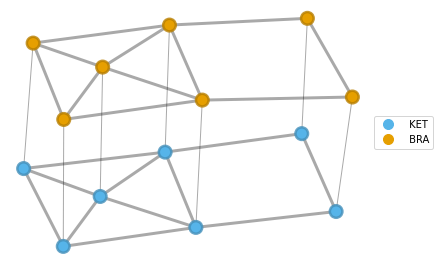

In [36]:
qenet.graph_psi()
norm=qenet.make_norm_tensor()
print(norm^all)
norm.graph(color=['KET','BRA'],show_tags=0)

In [168]:
# X,Y,Z = (qu.pauli(mu) for mu in ['x','y','z'])
# bra = vtn._psi.H

bra = vtn._psi.H

nop = qu.qu([[0, 0], [0, 1]])
G2 = nop&nop
G3 = ((X&X&X)+(Y&Y&X)) 

g2 = (bra|vtn.apply_gate(vtn._psi,G2,where=(0,1)))^all
g3 = (bra|vtn.apply_gate(vtn._psi,G3,where=(0,1,6)))^all

print(g2+g3)

GT = G3 + (G2&qu.eye(2))
gt = (bra|vtn.apply_gate(vtn._psi,GT,where=(0,1,6)))^all

print(gt)



# G_ket = vtn.apply_gate(vtn._psi, G, where=(0,1))
# vtn.compute_hop_expecs()

(0.06843018268845627+0j)
(0.06843018268845634+0j)


In [76]:
reload(beeky)
reload(sq)

T_PARAM=1.0
V_PARAM=1.5
MU_PARAM=1.5

qlat = sq.SpinlessQubitLattice(Lx=3,Ly=2)
qenet = beeky.QubitEncodeNet(qlat)
# qenet.graph_psi()
MyHam = beeky.SimulatorHam(qlat, (T_PARAM, V_PARAM, MU_PARAM))

print(qenet.compute_energy(T_PARAM, V_PARAM, MU_PARAM))

print(qenet.compute_ham_expec(MyHam))

qlat.make_simulator_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
H_d = qlat.ham_sim()
psi_d = qenet.to_dense()

print((psi_d.H @ H_d @ psi_d)[0][0])


(-0.3085512628100546+4.7704895589362195e-17j)
(-0.30855126281005535+4.7704895589362195e-17j)
(-0.30855126281005507-5.204170427930421e-18j)
